<a href="https://colab.research.google.com/github/sashwot10/5CS037/blob/main/worksheet2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd

# 1. Load dataset
bank = pd.read_csv("bank.csv")

# 2. Info
print(bank.info())

# (a) Columns with dtype object
object_cols = bank.select_dtypes(include="object").columns
print("Object columns:", object_cols.tolist())

# (b) Unique values in object columns
for col in object_cols:
    print(f"Unique values in {col}:", bank[col].unique())

# (c) Total number of null values in each column
print("Null values:\n", bank.isnull().sum())

# 3. Drop object columns and save new dataframe
bank_numeric = bank.drop(columns=object_cols)
bank_numeric.to_csv("banknumericdata.csv", index=False)

# 4. Read saved numeric csv and show summary statistics
bank_numeric_read = pd.read_csv("banknumericdata.csv")
print(bank_numeric_read.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
None
Object columns: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'mont

In [5]:
import pandas as pd

# 1. Load dataset
medical = pd.read_csv("medical_students_dataset.csv")

# 2. Check columns with missing values
print(medical.info())
print("Missing values:\n", medical.isnull().sum())

# 3. Impute missing values (mean for numeric, mode for object)
for col in medical.columns:
    if medical[col].isnull().sum() > 0:
        if medical[col].dtype == "object":
            medical[col].fillna(medical[col].mode()[0], inplace=True)
        else:
            medical[col].fillna(medical[col].mean(), inplace=True)

print("Missing values after imputation:\n", medical.isnull().sum())

# 4. Check duplicates and remove them
print("Duplicate rows before:", medical.duplicated().sum())
medical = medical.drop_duplicates()
print("Duplicate rows after:", medical.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Student ID      180000 non-null  float64
 1   Age             180000 non-null  float64
 2   Gender          180000 non-null  object 
 3   Height          180000 non-null  float64
 4   Weight          180000 non-null  float64
 5   Blood Type      180000 non-null  object 
 6   BMI             180000 non-null  float64
 7   Temperature     180000 non-null  float64
 8   Heart Rate      180000 non-null  float64
 9   Blood Pressure  180000 non-null  float64
 10  Cholesterol     180000 non-null  float64
 11  Diabetes        180000 non-null  object 
 12  Smoking         180000 non-null  object 
dtypes: float64(9), object(4)
memory usage: 19.8+ MB
None
Missing values:
 Student ID        20000
Age               20000
Gender            20000
Height            20000
Weight            20000
Bloo

/tmp/ipython-input-2601162568.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  medical[col].fillna(medical[col].mean(), inplace=True)
/tmp/ipython-input-2601162568.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

Missing values after imputation:
 Student ID        0
Age               0
Gender            0
Height            0
Weight            0
Blood Type        0
BMI               0
Temperature       0
Heart Rate        0
Blood Pressure    0
Cholesterol       0
Diabetes          0
Smoking           0
dtype: int64
Duplicate rows before: 12572
Duplicate rows after: 0


In [12]:
import pandas as pd

titanic = pd.read_csv("Titanic-Dataset.csv")

subset = titanic[['Name','Pclass','Sex','Age','Fare','Survived']]

first_class = subset[subset['Pclass'] == 1]

print("Mean Fare:", first_class['Fare'].mean())
print("Median Fare:", first_class['Fare'].median())
print("Max Fare:", first_class['Fare'].max())
print("Min Fare:", first_class['Fare'].min())

Mean Fare: 84.1546875
Median Fare: 60.287499999999994
Max Fare: 512.3292
Min Fare: 0.0


In [13]:
print("Null Age values:", first_class['Age'].isnull().sum())

first_class_clean = first_class.dropna(subset=['Age'])
print("Shape after dropping null Age:", first_class_clean.shape)


Null Age values: 30
Shape after dropping null Age: (186, 6)


In [19]:
import pandas as pd

titanic = pd.read_csv("Titanic-Dataset.csv")

# 1. One-hot encode
embarked_dummies = pd.get_dummies(titanic['Embarked'], prefix='Embarked')

# 2. Add new columns
titanic = pd.concat([titanic, embarked_dummies], axis=1)

# 3. Drop original column
titanic.drop(columns=['Embarked'], inplace=True)

# 4. Show few rows
print(titanic.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin  Embarked_C  Embarked_Q  Embarked_S  
0      0         A/5 21171   7.2500   NaN       False       False        True  
1      0          PC 17599  71.2833   C85        True       False       False  
2      0  STON/O2. 3101282   7.9250   NaN       False       False        True  


Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


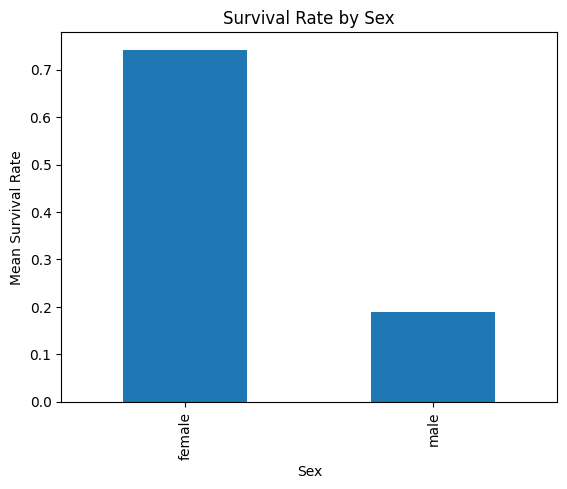

In [21]:
import matplotlib.pyplot as plt

survival_by_sex = titanic.groupby('Sex')['Survived'].mean()
print(survival_by_sex)

survival_by_sex.plot(kind='bar')
plt.xlabel("Sex")
plt.ylabel("Mean Survival Rate")
plt.title("Survival Rate by Sex")
plt.show()

Embarked         C         Q         S
Sex                                   
female    0.876712  0.750000  0.689655
male      0.305263  0.073171  0.174603


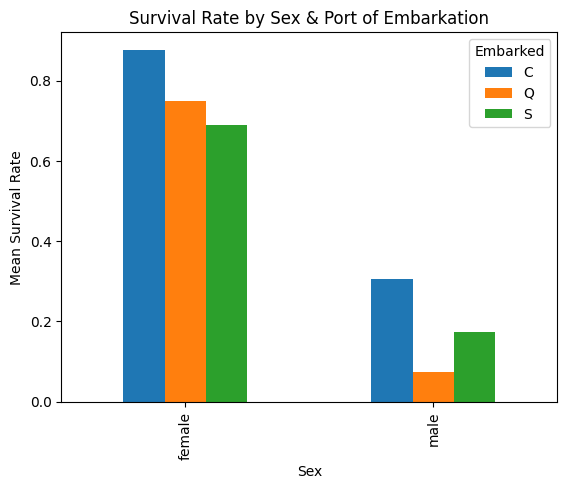

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the original Titanic dataset
titanic = pd.read_csv('Titanic-Dataset.csv')  # corrected file path

# Create pivot table: mean survival rate by Sex and Embarked
pivot = titanic.pivot_table(values='Survived', index='Sex', columns='Embarked', aggfunc='mean')
print(pivot)

# Plot the pivot table as a bar chart
pivot.plot(kind='bar')
plt.xlabel("Sex")
plt.ylabel("Mean Survival Rate")
plt.title("Survival Rate by Sex & Port of Embarkation")
plt.legend(title='Embarked')
plt.show()